### Generating Random Samples from Poisson Distribution using inverse transfer method

In [1]:
using Plots

In [2]:
import Statistics

### Method 1

In [3]:
function RV_Generator(lambda)
    U = rand()
    p =  exp(-lambda)
    A = p
    i=0
    while !(U < A )    # iterating from zero to till statisfy the condition
         p = lambda*p/(i+1)
         A = A +p 
         i=i+1
    end     
    return i     
end     

RV_Generator (generic function with 1 method)

In [4]:
array_samples_2  = []
# Considering the Sample Size  to be 1e3
lambda  = readline()
lambda = parse(Float64, lambda) 
for i in 1:1e3
    push!(array_samples_2,RV_Generator(lambda))
#     println(array[i])
end 
# println(array)
println(Statistics.mean(array_samples_2))
println(Statistics.var(array_samples_2))

stdin> 20
19.995
21.116091091091057


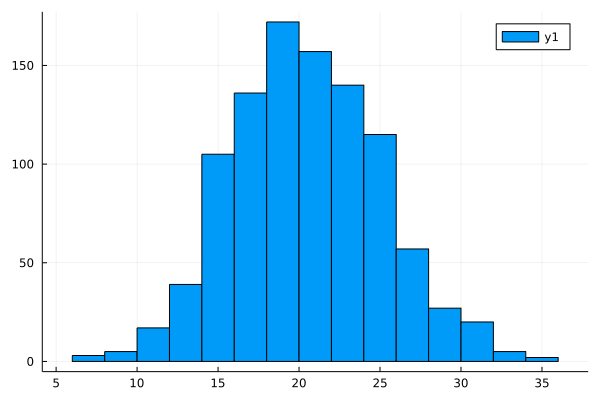

In [5]:
histogram(array_samples_2)

### Method 2

In [6]:
# For Calculation the sum of probability from i=0 to i= num
function Sum_(num,lambda)
    
    p_prev= exp(-lambda)                
    sum = p_prev
    for i in 1:num
        p_new  =  lambda*p_prev/(i)
        sum = sum + p_new
        p_prev = p_new
    end   
    return sum
end     

Sum_ (generic function with 1 method)

In [7]:
# Switching to other algorithm 

function RV_Generator_2(lambda)
    U = rand()
    num = Int64(floor(lambda))
   # return num
    while U>-1
        sum_num =  Sum_(num,lambda)
        sum_num_minus = Sum_(num-1,lambda)
        #sum_num_minus = sum_num  -  exp(-lambda)* lambda^(num)/factorial(num)
        if (sum_num_minus < U) && (sum_num>U)
            return num
        elseif  (sum_num<U)
            num = num+1
        elseif  (sum_num_minus >U)
            num = num -1        
        end         
    
    end 
    
end     

RV_Generator_2 (generic function with 1 method)

In [8]:
array_samples  = []
# Considering the Sample Size  to be 1e3
lambda  = readline()
lambda = parse(Float64, lambda) 
for i in 1:1e3
    push!(array_samples,RV_Generator_2(lambda))

end 

println(Statistics.mean(array_samples))
println(Statistics.var(array_samples))

stdin> 100
100.447
97.69288388388321


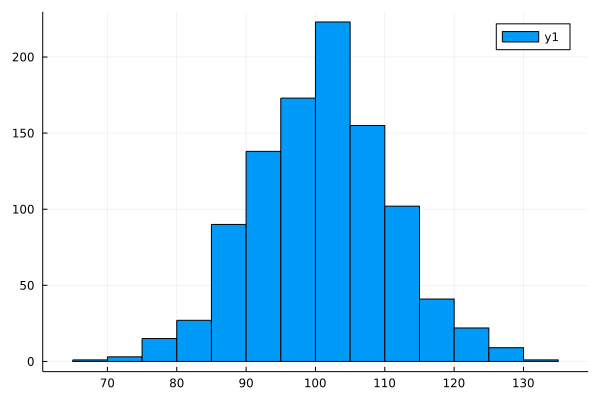

In [9]:
histogram(array_samples)

### Using Accept- Reject technique , draw random samples from binomial distribution  from a proposed poisson distribution


In [10]:
function Binomial(n,p)
    x = [val for val in 0:n]
    lamda  =  n*p  # To keep expectation of target and proposal distribution almost same ...
    c, index = findmax([binomial(n,x1)*((1-p)^(n-x1))*(p^x1)*factorial(x1)/(exp(-lamda)*(lamda^x1)) for x1 in x])
    c =  ceil(c)
    accept =0
    while (accept==0)
        y =  RV_Generator(lamda)
        ratio = binomial(n,y)*((1-p)^(n-y))*(p^y)*factorial(y)/(c*exp(-lamda)*(lamda^y))
        U = rand()
        if (U< ratio)
            accept = 1
            return y
        end    
    end 
end     

Binomial (generic function with 1 method)

In [13]:
println("Enter the number of trials of Binomial Distribution")
n =  readline()
n = parse(Int64,n)
println("Enter the probabilty ( i.e. p) of Binomial Distribution")
p =  readline()
p = parse(Float64,p)

Samples  = []
for i in 1:1e3 
    push!(Samples,Binomial(n,p))
end
println(Statistics.mean(Samples))
println(Statistics.var(Samples))

stdin> 15
stdin> 0.34
Enter the number of trials of Binomial Distribution
Enter the probabilty ( i.e. p) of Binomial Distribution
5.073
3.433104104104086


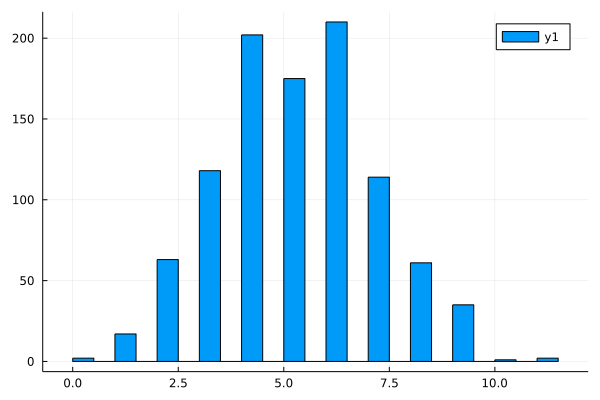

In [14]:
histogram(Samples)